In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Importing data
salary_data_train = pd.read_csv('/home/suraj/Downloads/Assignments/Assignment-12/SalaryData_Train.csv')
salary_data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary_data_test = pd.read_csv('/home/suraj/Downloads/Assignments/Assignment-12/SalaryData_Test.csv')
salary_data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
salary_data_train.shape, salary_data_test.shape

((30161, 14), (15060, 14))

In [10]:
salary_data_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
salary_data_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [7]:
salary_data_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
salary_data_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

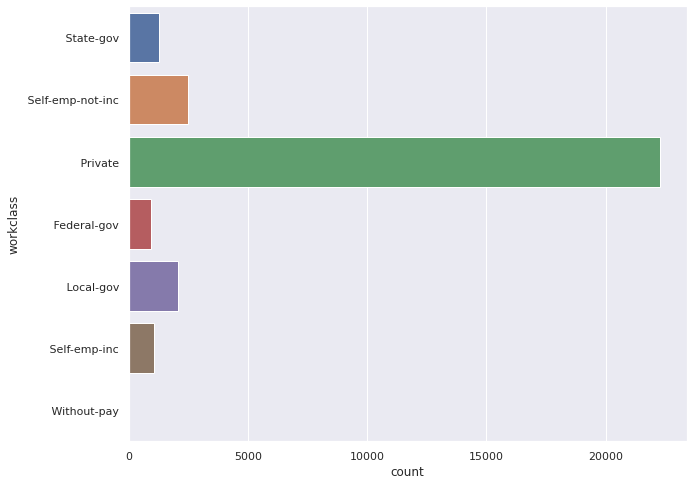

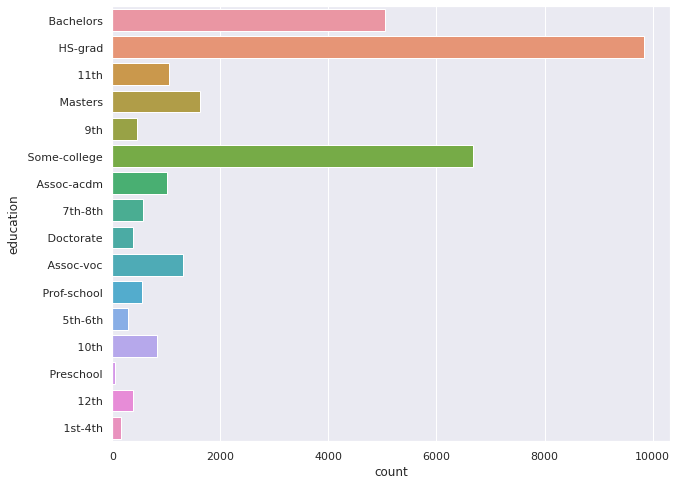

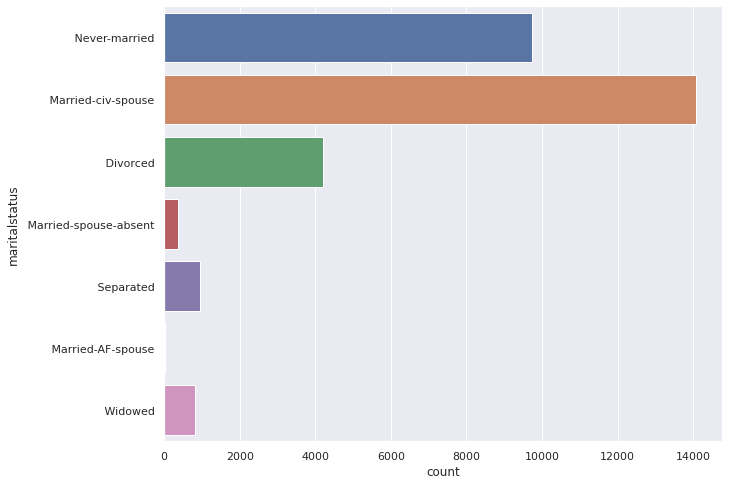

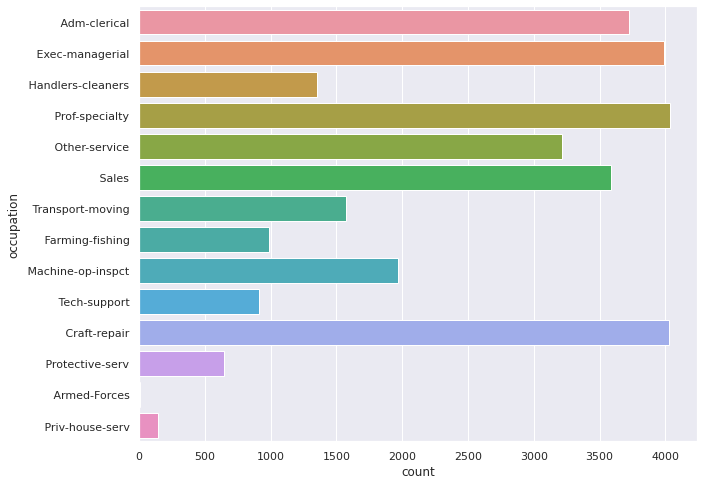

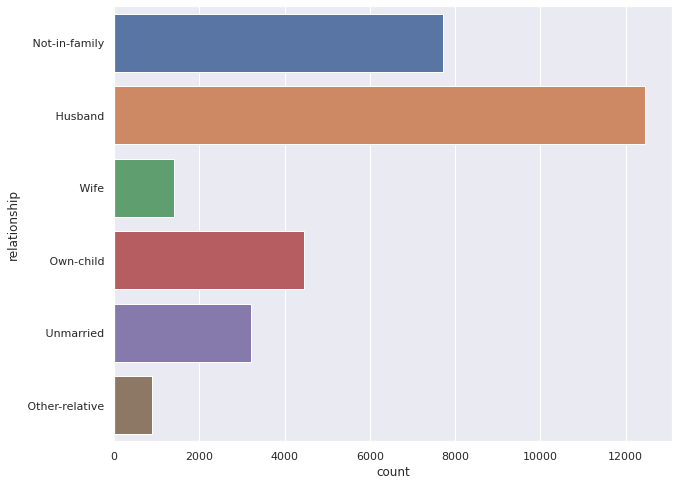

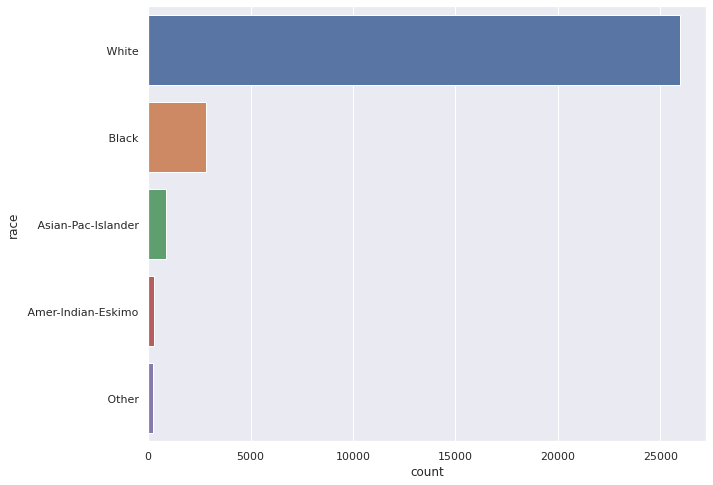

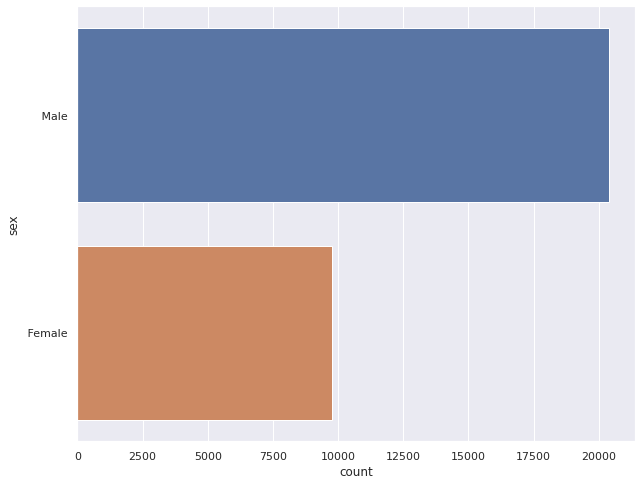

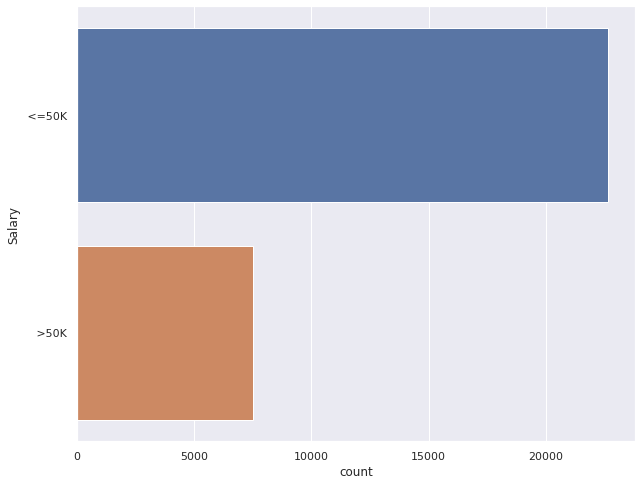

In [24]:
# countplot for all categorical columns
sns.set(rc={'figure.figsize':(10,8)})
str_column = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in str_column:
    plt.figure() 
    sns.countplot(y = col, data = salary_data_train)

In [58]:
# defining train and test values

X_train = salary_data_train.drop(['Salary'],axis=1)
y_train = salary_data_train['Salary']

X_test = salary_data_test.drop(['Salary'], axis=1)
y_test = salary_data_test['Salary']

In [36]:
# Coverting the categorical values using encoders

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [34]:
ohe = OneHotEncoder()
le = LabelEncoder()

In [47]:
ct = ColumnTransformer(transformers=[('tnf1',OneHotEncoder(drop='first'),['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])],
                                               remainder='passthrough')

In [59]:
X_train1 = ct.fit_transform(X_train)
X_test1 = ct.transform(X_test)

In [60]:
y_train1 = le.fit_transform(y_train)
y_test1 = le.transform(y_test)

In [66]:
X_train1.toarray().shape, y_train1.shape

((30161, 94), (30161,))

In [67]:
X_test1.toarray().shape, y_test1.shape

((15060, 94), (15060,))

In [68]:
# Model building
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [77]:
MB = MultinomialNB()
classifier_mb = MB.fit(X_train1,y_train1)

In [79]:
GB = GaussianNB()
classifier_gb = GB.fit(X_train1.toarray(),y_train1)

In [83]:
#Model testing
MB
y_train_pred_mb = classifier_mb.predict(X_train1)
y_test_pred_mb = classifier_mb.predict(X_test1)

GB
y_train_pred_gb = classifier_gb.predict(X_train1.toarray())
y_test_pred_gb = classifier_gb.predict(X_test1.toarray())

In [84]:
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix

In [86]:
print('MB training Accuracy  : ',accuracy_score(y_train1,y_train_pred_mb))
print('MB test Accuracy      : ',accuracy_score(y_test1,y_test_pred_mb))
print('GB training Accuracy  : ',accuracy_score(y_train1,y_train_pred_gb))
print('GB test Accuracy      : ',accuracy_score(y_test1,y_test_pred_gb))

MB training Accuracy  :  0.7729186698053778
MB test Accuracy      :  0.7749667994687915
GB training Accuracy  :  0.8221875932495607
GB test Accuracy      :  0.8219123505976096


In [100]:
print('MB training confusion_matrix  : \n',confusion_matrix(y_train1,y_train_pred_mb))
print('MB test confusion_matrix      : \n',confusion_matrix(y_test1,y_test_pred_mb))
print('GB training confusion_matrix  : \n',confusion_matrix(y_train1,y_train_pred_gb))
print('GB test confusion_matrix      : \n',confusion_matrix(y_test1,y_test_pred_gb))

MB training confusion_matrix  : 
 [[21717   936]
 [ 5913  1595]]
MB test confusion_matrix      : 
 [[10891   469]
 [ 2920   780]]
GB training confusion_matrix  : 
 [[19370  3283]
 [ 2080  5428]]
GB test confusion_matrix      : 
 [[9685 1675]
 [1007 2693]]
